In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import pickle



df = pd.read_csv('car_insurance.csv')

In [ ]:
# Données manquantes (NaN)
print(df.sum())
df['credit_score'] = df['credit_score'].fillna(df['credit_score'].mean())
df['annual_mileage'] = df['annual_mileage'].fillna(df['annual_mileage'].mean())
df.isna().sum()

id                                                            5005219068
age                                                                14895
gender                                                              4990
driving_experience     0-9y0-9y0-9y0-9y10-19y20-29y30y+0-9y20-29y0-9y...
education              high schoolnonehigh schooluniversitynonehigh s...
income                 upper classpovertyworking classworking classwo...
credit_score                                                 4651.599917
vehicle_ownership                                                 6970.0
vehicle_year           after 2015before 2015before 2015before 2015bef...
married                                                           4983.0
children                                                          7086.0
postal_code                                                    198645484
annual_mileage                                               105776000.0
vehicle_type           sedansedansedansedansedansed

id                     0
age                    0
gender                 0
driving_experience     0
education              0
income                 0
credit_score           0
vehicle_ownership      0
vehicle_year           0
married                0
children               0
postal_code            0
annual_mileage         0
vehicle_type           0
speeding_violations    0
duis                   0
past_accidents         0
outcome                0
dtype: int64

In [ ]:
# Données aberrantes
df['children'].unique()
print(df["id"].nunique()) #On vérifie que les id sont bien uniques
# On voit que certaines ont 24, 72 ou 103 enfants. Les autres ont 0 ou 1 enfant.
# Pour cette raison, nous pensons que cette donnée ne correspond pas au nombre d'enfants par personne mais à leur possession d'enfant (valeur booléene)
# Comme 24, 72 et 103 sont supérieurs à 1, nous remplaçons les 3 valeurs par 1.
df['children'] = df['children'].replace([24, 72, 103], 1)
df['children'].unique()

df['speeding_violations'].unique()
df['speeding_violations'] = df['speeding_violations'].replace([6743, 345, 2867, 41056, 12035], df['speeding_violations'].median())
df['speeding_violations'].unique()



10000


array([ 0,  2,  3,  7,  6,  4, 10, 13,  1,  5,  9,  8, 12, 11, 15, 17, 19,
       18, 16, 14, 22])

In [ ]:
# Transformation des variables qualitatives en variables numériques :
# Changement en booléens
df['vehicle_year'] = df['vehicle_year'].replace(["after 2015"], 1)
df['vehicle_year'] = df['vehicle_year'].replace(["before 2015"], 0)

df['vehicle_type'] = df['vehicle_type'].replace(["sedan"], 1)
df['vehicle_type'] = df['vehicle_type'].replace(["sports car"], 0)

le = LabelEncoder()
#Encodage des chaînes de caractères

df['driving_experience'] = le.fit_transform(df['driving_experience'])
df['education'] = le.fit_transform(df['education'])
df['income'] = le.fit_transform(df['income'])
df['postal_code'] = le.fit_transform(df['postal_code'])


X = df.iloc[:, :-1]
y = df.iloc[:, -1]


In [ ]:
df['outcome'].unique()

array([0., 1.])

In [ ]:
# Normalisation des données
scaler = StandardScaler()
X = scaler.fit_transform(X)

print(X)

# Convertir les données normalisées en DataFrame pandas
#df = pd.DataFrame(normalized_data, columns=df.columns)

[[ 0.23791111  1.4733327  -0.998002   ... -0.66146157 -0.43102013
  -0.63926317]
 [ 0.86147958 -1.45284943  1.002002   ... -0.66146157 -0.43102013
  -0.63926317]
 [-1.03656567 -1.45284943 -0.998002   ... -0.66146157 -0.43102013
  -0.63926317]
 ...
 [-0.11072795 -0.47745538  1.002002   ... -0.66146157 -0.43102013
  -0.63926317]
 [ 1.38936032 -0.47745538 -0.998002   ...  0.23065734 -0.43102013
  -0.03407225]
 [-0.19938849 -0.47745538 -0.998002   ... -0.66146157 -0.43102013
  -0.63926317]]


In [ ]:
# Recherche de corrélations
correlation_matrix = df.corr()
print(correlation_matrix)

                           id       age    gender  driving_experience  \
id                   1.000000  0.013512 -0.007343            0.004298   
age                  0.013512  1.000000  0.005929            0.707393   
gender              -0.007343  0.005929  1.000000            0.007511   
driving_experience   0.004298  0.707393  0.007511            1.000000   
education           -0.008880  0.153339  0.082831            0.094116   
income              -0.006655  0.145340  0.012226            0.086181   
credit_score         0.001621  0.471419 -0.077478            0.327672   
vehicle_ownership    0.009197  0.272140  0.007385            0.202788   
vehicle_year        -0.003281  0.235390  0.010674            0.164915   
married              0.014797  0.384468  0.008593            0.269726   
children             0.000921  0.383148 -0.002640            0.277128   
postal_code          0.007275  0.008454 -0.002093            0.006297   
annual_mileage      -0.002111 -0.263838 -0.015068  

##Signification des coefficients de corrélation :

Les coefficients de corrélation varient entre -1 et 1.
Un coefficient proche de 1 indique une forte corrélation positive entre les variables.
Un coefficient proche de -1 indique une forte corrélation négative entre les variables.
Un coefficient proche de 0 indique une faible corrélation linéaire entre les variables.


Variables les plus corrélées entre elles :
On peut observer des coefficients de corrélation élevés entre certaines paires de variables, par exemple 0.707 entre age et driving_experience, 0.471 entre age et credit_score, et 0.637 entre driving_experience et speeding_violations.

Variables les plus corrélées avec la variable de sortie (outcome) :
Les coefficients de corrélation entre age et outcome, driving_experience et outcome, ainsi que past_accidents et outcome sont significatifs, respectivement -0.448, -0.497 et -0.311.

Variables les plus pertinentes pour la classification :
Les variables ayant une corrélation élevée avec la variable de sortie (outcome), telles que age, driving_experience et past_accidents, pourraient être les plus utiles pour la classification.


[3 0 1 2]


array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='driving_experience', ylabel='age'>,
        <Axes: xlabel='past_accidents', ylabel='age'>,
        <Axes: xlabel='outcome', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='driving_experience'>,
        <Axes: xlabel='driving_experience', ylabel='driving_experience'>,
        <Axes: xlabel='past_accidents', ylabel='driving_experience'>,
        <Axes: xlabel='outcome', ylabel='driving_experience'>],
       [<Axes: xlabel='age', ylabel='past_accidents'>,
        <Axes: xlabel='driving_experience', ylabel='past_accidents'>,
        <Axes: xlabel='past_accidents', ylabel='past_accidents'>,
        <Axes: xlabel='outcome', ylabel='past_accidents'>],
       [<Axes: xlabel='age', ylabel='outcome'>,
        <Axes: xlabel='driving_experience', ylabel='outcome'>,
        <Axes: xlabel='past_accidents', ylabel='outcome'>,
        <Axes: xlabel='outcome', ylabel='outcome'>]], dtype=object)

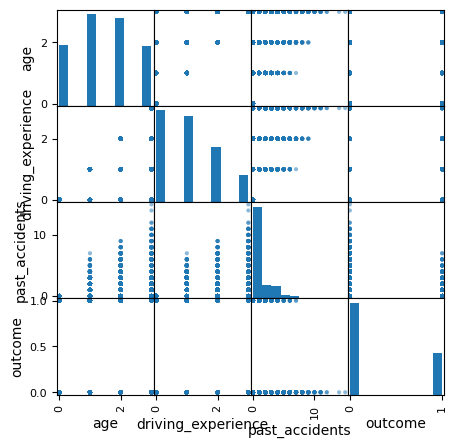

In [ ]:
print(df["age"].unique())

matrice1 = ["age","driving_experience", "past_accidents","outcome"]

scatter_matrix(df[matrice1], figsize=(5,5))

##Analyse des matrices de nuages de points

Les 4 variables sont camparées dans des matrices deux à deux. On s'intéresse aux matrices contenues dans le triangle en bas à gauche.
Sur la diagonale, on retrouve les histogrammes des dispersions des valeurs pour chaque variable</br></br>

###Age et Driving Experience:
Il semble y avoir une répartition uniforme des catégories d'âge sur différents niveaux d'expérience de conduite.
On retrouve de tous les âges dans les personnes inexpérimentées, mais les personnes très expérimentées (+30ans) ont toutes plus de 65 ans.
Ainsi, plus on acquiert de l'expérience de conduite, plus on vieillit.</br></br>

###Age et Past Accidents:
La distribution des "past_accidents" par rapport à "age" semble montrer que certaines catégories d'âge ont plus d'accidents passés.
Les points montrent que les personnes ayant plus d'accidents passés sont les plus âgées. Toutefois, il est possible de ne pas avoir d'accident passé peu importe l'âge.</br></br>

###Age et Outcome:
La relation entre "age" et "outcome" montre que certaines catégories d'âge ont des résultats différents en termes de "outcome". Le nombre de outcome paraît être uniforme sans regard de l'âge</br></br>


###Driving Experience et Past Accidents:
Cette relation montre comment l'expérience de conduite affecte le nombre d'accidents passés. Certaines catégories d'expérience de conduite semblent avoir des fréquences d'accidents différentes. Plus l'expérience de conduite est élevée, plus il y a de personnes avec beaucoup d'accidents passés.</br></br>

###Driving Experience et Outcome:
La relation entre "driving_experience" et "outcome" montre que certaines catégories d'expérience de conduite ont des résultats différents.Le nombre de outcome paraît être uniforme sans regard de l'expérience de conduite.</br></br>


Past Accidents et Outcome:
Cette relation montre comment le nombre d'accidents passés affecte l'issue ("outcome").
Les points montrent que plus une personne a d'accident, moins elle fait de demande d'indemnisation auprès de son assurance automobile. Ce critère est donc intéressant pour notre problème. </br></br>

In [ ]:
# Extraction des jeux d’apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) #Nous avons spécifié random_state pour de garder la même découpe, afin que l'analyse des résultats portent sur des constantes.
print(X_train.shape)
print(X_test.shape)

(7500, 17)
(2500, 17)


Le jeu d'apprentissage: 75% <br>
Le jeu de test: 25%


In [ ]:
# Entraînement d’un modèle

# Créer un modèle de régression logistique
model = LogisticRegression()

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train, y_train)

# Prédire les étiquettes pour les données de test
y_pred = model.predict(X_test)

# 8 Entraînement d'un modèle

## Hypothèse :
Quelle hypothèse fait-on sur le logarithme du rapport des vraisemblances (appelé fonction logit) : $log(\frac{p(y=1|x)}{p(y=0|x)})$ ?
</br></br>

L'hypothèse principale faite sur le $log$ est qu'il est égal à un produit scalaire de $\vec{w}$ et de $\vec{x}$, plus une constante $β_{0}$.</br>
$\vec{w}$ correspond au vecteur formé par les paramètres $β$ du modèle à estimer.</br>
$\vec{x}$ correspond au vecteur formé par les features du jeu de données (ou variables explicatives).</br>
$β_{0}$ est également un paramètre du modèle à estimer.</br>
Les features doivent toutes être des variables continues ou binaires.

### Minimisation de la fonction de coût :

 Quelle technique l’algorithme peut-il utiliser pour minimiser la fonction de coût ?</br></br>

La technique de la descente de gradient permet à l'algorithme de réduire la fonction de coût.


## Apprentissage

Quels paramètres sont calculés pendant la phase d’apprentissage de l’algorithme ?</br></br>

Durant l'apprentissage, les coefficients $β$ (ou poids), ainsi que le biais $β_{0}$ sont calculés.

In [ ]:
# Evaluation du modèle

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

confusion = confusion_matrix(y_test, y_pred)
print(f'Confusion: \n{confusion}')

precision = precision_score(y_test, y_pred)
print(f'Precision: {precision}')

recall = recall_score(y_test, y_pred)
print(f'Recall: {recall}')

f1 = f1_score(y_test, y_pred)
print(f'F1 score: {f1}')

Accuracy: 0.8424
Confusion: 
[[1559  164]
 [ 230  547]]
Precision: 0.7693389592123769
Recall: 0.703989703989704
F1 score: 0.7352150537634409


## Signification des métriques

### Accuracy
Formule : ( 𝑇 𝑃 + 𝑇 𝑁 ) / ( 𝑇 𝑃 + 𝑇 𝑁 + 𝐹 𝑃 + 𝐹 𝑁 )</br>
Signification : La proportion des prédictions correctes parmi toutes les prédictions. Ici, 84,24% des prédicitions du modèle sur le jeu de test étaient correctes.
</br></br>

### Confusion Matrix (Matrice de confusion)
1564 True Negatives : Le modèle a correctement identifié 1564 clients qui n'ont pas fait de demande d'indemnisation. </br>
160 False Positives : Le modèle a incorrectement identifié 160 clients  qui ont fait de demande d'indemnisation alors qu'ils n'en ont pas fait.</br>
218 False Negatives : Le modèle a incorrectement identifié 218 clients  qui n'ont pas fait de demande d'indemnisation alors qu'ils en ont fait une.</br>
558 True Positives : Le modèle a correctement identifié 558 clients  qui ont fait de demande d'indemnisation.
</br></br>

### Precision
Formule : 𝑇𝑃/(𝑇𝑃+𝐹𝑃)</br>
Signification : La proportion des prédictions positives correctes parmi toutes les prédictions positives. Indique la qualité des prédictions positives du modèle.</br>
Résultas : Cela signifie que 76.93% des prédictions positives du modèle sont correctes. C'est une bonne indication que la majorité des prédictions positives sont fiables.
</br></br>

### Recall
Formule : 𝑇 𝑃 / ( 𝑇 𝑃 + 𝐹 𝑁 )</br>
Signification : La proportion des véritables positifs qui ont été correctement identifiés par le modèle. Indique la capacité du modèle à trouver toutes les instances positives.</br>
Résultats: Cela signifie que le modèle a identifié 71.91% des instances positives réelles. Le rappel étant plus bas que la précision indique que le modèle rate encore des instances positives.
</br></br>


### F1 Score
Formule : $2×(precision×recall)/(precision+recall)$</br>

Signification : La moyenne harmonique de la précision et du rappel. Elle est utile pour évaluer le modèle lorsqu'il y a un déséquilibre entre les classes.</Br>
Résultats : Le F1 score combine la précision et le rappel, offrant un équilibre entre les deux. Un F1 score de 74.70% indique que le modèle a une performance raisonnablement bonne en termes de précision et de rappel.


In [ ]:
# Amélioration de l'évaluation

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')

print(f'Cross-validation scores: {scores}')
print(f'Score moyen: {scores.mean()}')
print(f'Ancienne accuracy : {accuracy}')

# On constate que l'accuracy moyenne est plus haute que l'ancienne accuracy.

Cross-validation scores: [0.8425 0.8405 0.851  0.845  0.8475]
Score moyen: 0.8452999999999999
Ancienne accuracy : 0.8424


In [ ]:
# Comparaison avec d’autres algorithmes

lr = LogisticRegression()
ppn = Perceptron()
knn = KNeighborsClassifier()
classifiers = [lr,ppn,knn]

# Évaluation des classifieurs par validation croisée
for clf in classifiers:
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{clf} Cross-Validation Accuracy Scores: {scores}")
    print(f"{clf} Mean Accuracy: {scores.mean()}\n")

# On constate que la régression logistique possède les meilleurs scores en tous points.

LogisticRegression() Cross-Validation Accuracy Scores: [0.83533333 0.84333333 0.85466667 0.83866667 0.85      ]
LogisticRegression() Mean Accuracy: 0.8443999999999999

Perceptron() Cross-Validation Accuracy Scores: [0.77466667 0.72333333 0.82666667 0.794      0.79666667]
Perceptron() Mean Accuracy: 0.7830666666666666

KNeighborsClassifier() Cross-Validation Accuracy Scores: [0.80266667 0.808      0.81733333 0.79466667 0.79733333]
KNeighborsClassifier() Mean Accuracy: 0.8039999999999999



In [ ]:
# Sauvgarde du modèle

model_filename = 'modelLogisticRegression.pickle'

with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

# Chargement du modèle

with open(model_filename, 'rb') as file:
    loaded_model = pickle.load(file)

# Test du chargement

print(f"Accuracy moyenne du modèle importé : {cross_val_score(loaded_model, X, y, cv=5, scoring='accuracy').mean()}")

Accuracy moyenne du modèle importé : 0.8447000000000001
